Name : Heru Leonardo

**A descriptive analysis of the additives (columns named as “a” to “i”), which must include 
summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is 
a must.**

In [1]:
#main driver
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil
from google.colab import drive
from keras.preprocessing import image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
# importing libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import requests # library to handle requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import math
import scipy.stats as stats 
from google.colab import files
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import scipy
import seaborn as sns

Right now, we are trying to do Hypothesis testing.
the processes: 
1.   Purposes: to look for correlation of each data
2.   Assumptions : if needed , we can make some assumptions to the data
3.   How to: Analyze the correlation in each data with some statistical methods
4.   Intrepret: Making summary of analysis

1. Upload that file that needed to analyze

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ingredient.csv to ingredient.csv


In [3]:
additives_df=pd.read_csv('ingredient.csv')

2. Look at the Data of ingredient.csv

In [4]:
additives_df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


# **Data Cleaning** 
lets simply clear the dataset by dropping the rows that have null value:

In [5]:
print ("Shape of dataset before cleaning: ", additives_df.size)
additives_df[[ 'a', 'b', 'c', 'd', 'e',
       'f', 'g', 'h', 'i']] = additives_df[[ 'a', 'b', 'c', 'd', 'e',
       'f', 'g', 'h', 'i']].apply(pd.to_numeric, errors='coerce')
additives_df = additives_df.dropna()
additives_df = additives_df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", additives_df.size)
additives_df.head(5)

Shape of dataset before cleaning:  1926
Shape of dataset after cleaning:  1926


,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [6]:
corr_additives = additives_df.corr()

3. Look at the Correlation of the data in all aspects. and it tells in overall it doesnt really have correlation because the numbers tells it has a preety low correlation.

In [7]:
print(corr_additives)

          a         b         c  ...         g         h         i
a  1.000000 -0.191885 -0.122274  ...  0.810403 -0.000386  0.143010
b -0.191885  1.000000 -0.273732  ... -0.275442  0.326603 -0.241346
c -0.122274 -0.273732  1.000000  ... -0.443750 -0.492262  0.083060
d -0.407326  0.156794 -0.481799  ... -0.259592  0.479404 -0.074402
e -0.542052 -0.069809 -0.165927  ... -0.208732 -0.102151 -0.094201
f -0.289833 -0.266087  0.005396  ... -0.317836 -0.042618 -0.007719
g  0.810403 -0.275442 -0.443750  ...  1.000000 -0.112841  0.124968
h -0.000386  0.326603 -0.492262  ... -0.112841  1.000000 -0.058692
i  0.143010 -0.241346  0.083060  ...  0.124968 -0.058692  1.000000

[9 rows x 9 columns]


4. From here we can try to derive the correlation between a - i from the statistics analytics that we have done

In [8]:
additives_df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


**Normality test using Shapiro-Wilk Test : tests If data is normally distributed**
*   Assumption : Observations are identically distributed


Checking histogram indentify by one variable

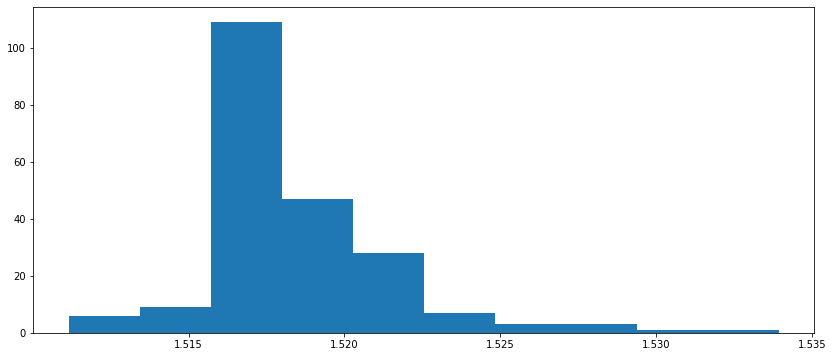

In [9]:
plt.figure(figsize=(14,6))
plt.hist(additives_df.a)
plt.show()

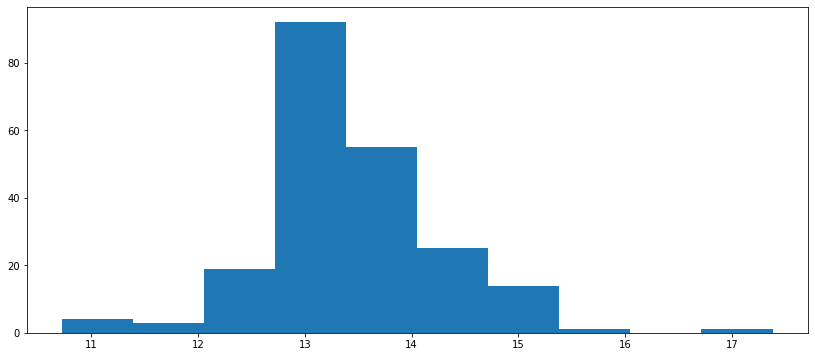

In [10]:
plt.figure(figsize=(14,6))
plt.hist(additives_df.b)
plt.show()

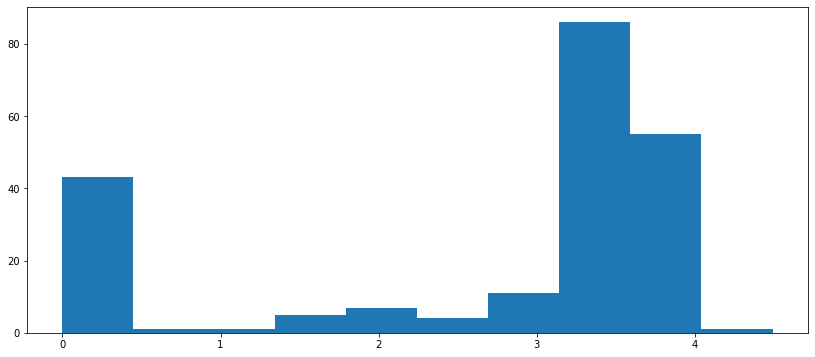

In [11]:
plt.figure(figsize=(14,6))
plt.hist(additives_df.c)
plt.show()

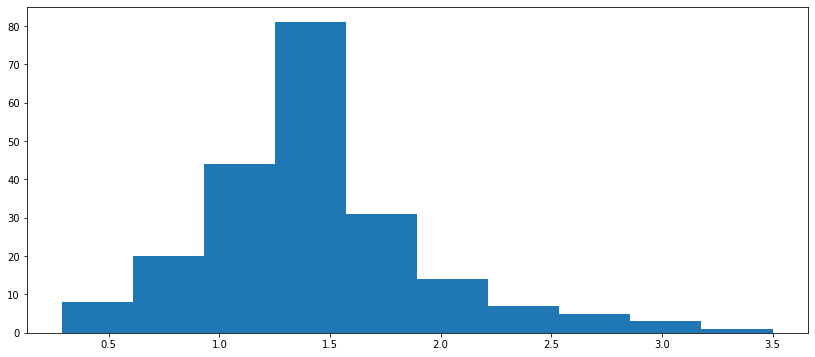

In [12]:
plt.figure(figsize=(14,6))
plt.hist(additives_df.d)
plt.show()

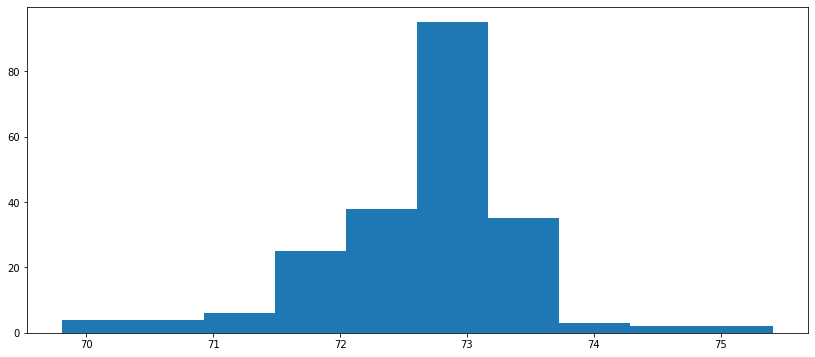

In [13]:
plt.figure(figsize=(14,6))
plt.hist(additives_df.e)
plt.show()

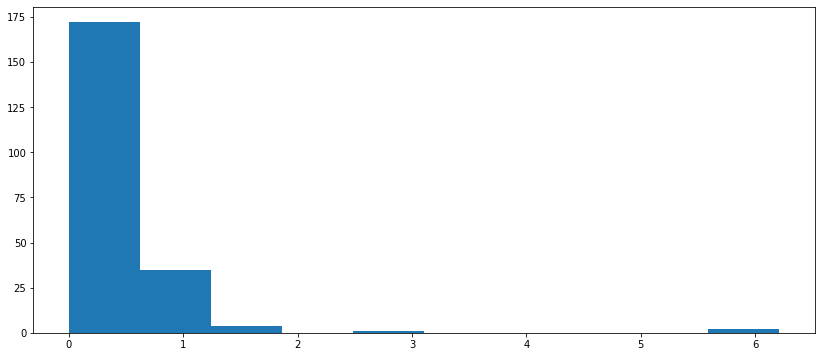

In [14]:
plt.figure(figsize=(14,6))
plt.hist(additives_df.f)
plt.show()

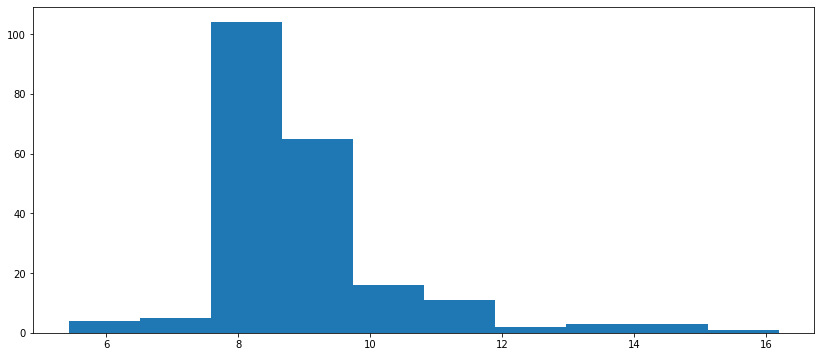

In [15]:
plt.figure(figsize=(14,6))
plt.hist(additives_df.g)
plt.show()

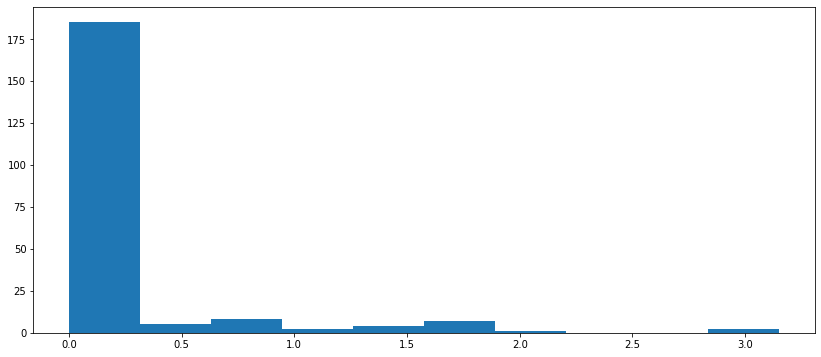

In [16]:
plt.figure(figsize=(14,6))
plt.hist(additives_df.h)
plt.show()

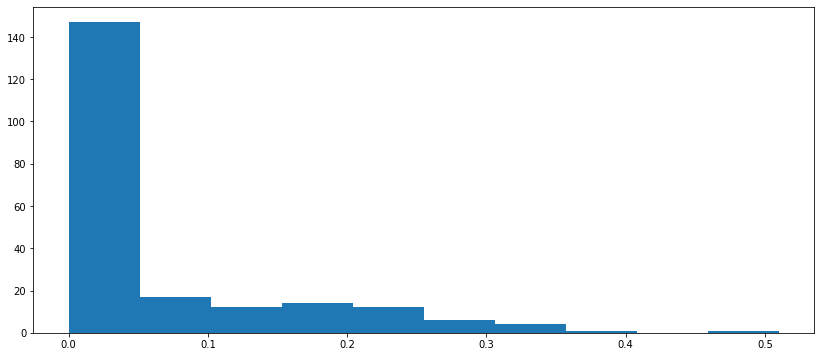

In [17]:
plt.figure(figsize=(14,6))
plt.hist(additives_df.i)
plt.show()

From the overall histogram that being showed. It looks like it doesnt have a normal distribution.

Let's Clarify things with statistical method which is Shapiro-Wilk Test

In [18]:
#Help from Python
from scipy.stats import shapiro

DataToTest = additives_df['a']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.87, p=0.000000000001076643223359152746
Not a normal distribution


In [19]:
DataToTest = additives_df['b']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.95, p=0.000000346568327813656651414931
Not a normal distribution


In [20]:
DataToTest = additives_df['c']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.70, p=0.000000000000000000239089938614
Not a normal distribution


In [21]:
DataToTest = additives_df['d']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.94, p=0.000000208319562489123200066388
Not a normal distribution


In [22]:
DataToTest = additives_df['e']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.92, p=0.000000002174813440447564971691
Not a normal distribution


In [23]:
DataToTest = additives_df['f']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.44, p=0.000000000000000000000000217217
Not a normal distribution


In [24]:
DataToTest = additives_df['g']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.79, p=0.000000000000000428665375155272
Not a normal distribution


In [25]:
DataToTest = additives_df['h']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.41, p=0.000000000000000000000000053833
Not a normal distribution


In [26]:
DataToTest = additives_df['i']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.65, p=0.000000000000000000011566687841
Not a normal distribution


Okay From the test above, seems like our guess is true if it is not a normal distribution.

Let us use another test method to compare and validate the test above using K^2 Normality Test

**Normality test using K^2 Normality Test : tests If data is normally distributed**
*   Assumption : Observations are identically distributed

In [27]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = additives_df['a']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not a Normal distributed')

stat=84.3584761624, p=0.0000000000
Not a Normal distributed


In [28]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = additives_df['b']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not a Normal distributed')

stat=27.0151232270, p=0.0000013606
Not a Normal distributed


In [29]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = additives_df['c']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not a Normal distributed')

stat=35.8847018888, p=0.0000000161
Not a Normal distributed


In [30]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = additives_df['d']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not a Normal distributed')

stat=36.7734853144, p=0.0000000103
Not a Normal distributed


In [31]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = additives_df['e']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not a Normal distributed')

stat=35.8729528583, p=0.0000000162
Not a Normal distributed


In [32]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = additives_df['f']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not a Normal distributed')

stat=305.6655371892, p=0.0000000000
Not a Normal distributed


In [33]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = additives_df['g']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not a Normal distributed')

stat=109.4726194409, p=0.0000000000
Not a Normal distributed


In [34]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = additives_df['h']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not a Normal distributed')

stat=177.2799555777, p=0.0000000000
Not a Normal distributed


In [35]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = additives_df['i']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not a Normal distributed')

stat=76.8665206572, p=0.0000000000
Not a Normal distributed


Okay From the test above we can conclude overall it doesnt have a normal distributed data.

**Correlation Test - Pearson and Spearman’s Rank Correlation**

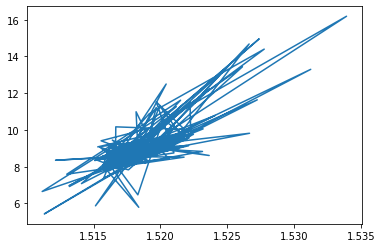

In [36]:
FirstSample = additives_df['a']
SecondSample = additives_df['g']

plt.plot(FirstSample,SecondSample)
plt.show()

In [37]:
#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.704, p=0.000000
dependent samples


The statistical test reports a strong positive correlation with a value of 0.704. The p-value is close to zero, which means that the likelihood of observing the data given that the samples are uncorrelated is very unlikely (e.g. 95% confidence) and that we can reject the null hypothesis that the samples are uncorrelated.

In [38]:
#pearson correlation
from scipy.stats import pearsonr
stat, p = pearsonr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.810, p=0.000000
dependent samples


The p-value is close to zero (and printed as zero), as with the Spearman’s test, meaning that we can confidently reject the null hypothesis that the samples are uncorrelated.

In [39]:
additives_df.corr(method="pearson")

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


**Parametic test 1- T**

In [40]:
#One Sample T-test
import scipy
scipy.stats.ttest_1samp(additives_df['a'],1.53)

Ttest_1sampResult(statistic=-56.04440591234512, pvalue=1.7850572597438672e-129)

In [41]:
# compare samples
stat, p = scipy.stats.ttest_ind(additives_df['a'], additives_df['g'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-76.462, p=0.000
Different distributions (reject H0)


The interpretation of the statistic finds that the sample means are different, with a significance of at least 5%.

In [42]:
#Independent Sample T-test
scipy.stats.ttest_ind(additives_df['a'],additives_df['g'])

Ttest_indResult(statistic=-76.46191990545381, pvalue=6.496271002116892e-251)

In [43]:
print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=-76.462, p=0.000000
dependent samples


Parametic test 2 - Anova - Tests whether the means of two or more independent samples are significantly different.

In [44]:
tstat, p = scipy.stats.f_oneway(additives_df['a'],additives_df['b'],additives_df['g'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution of scores')
else:
    print('Different distributions of scores')

stat=-76.462, p=0.000
Different distributions of scores


**A graphical analysis of the additives, including a distribution study**

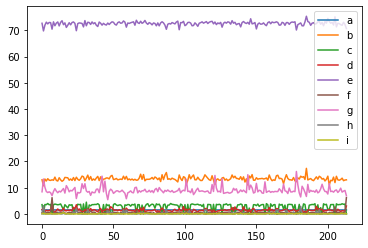

In [45]:
additives_df.plot()

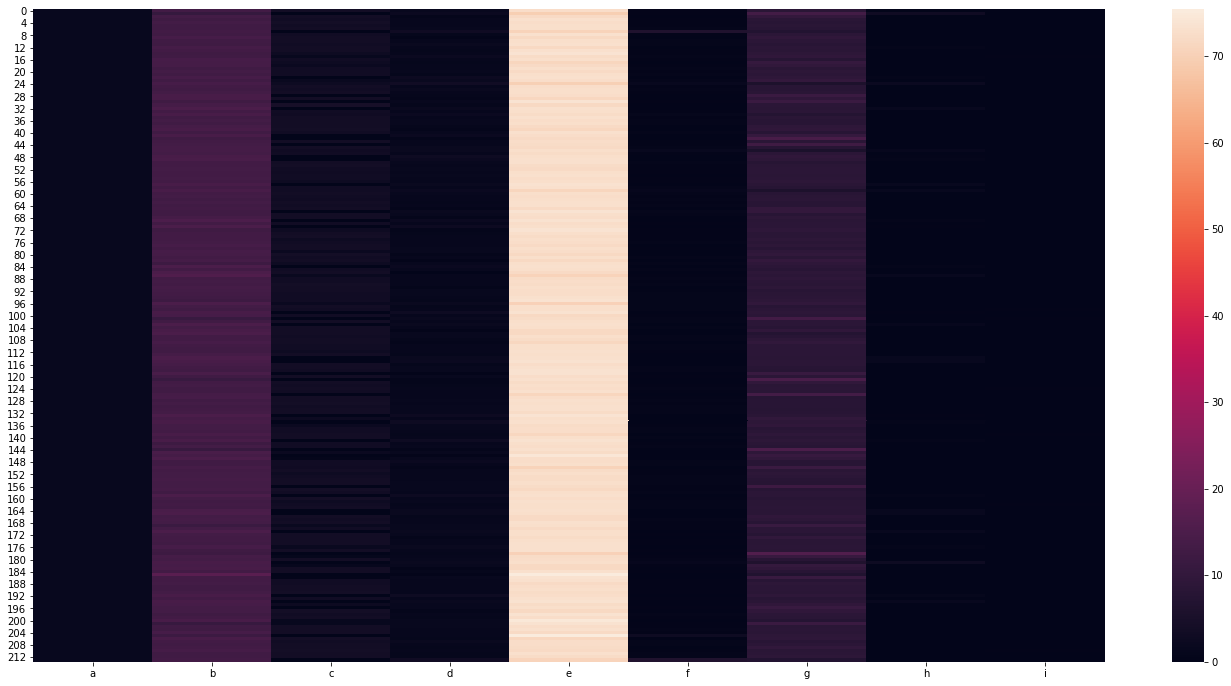

In [46]:
#check correltion matrix - to check the strength of variation bwtween nine variables
correlation_matrix = additives_df.corr().round(2)
fgr, ax = plt.subplots(figsize =(24,12)) 
import seaborn as sns
c = sns.heatmap(additives_df)
fgr.savefig("myimage.png")

From The test above we can conclude that variable e have the highest correlation with other variable. it can be seen from the line graph too. it is in the middle of the other line and somehow we can correlate it.

**a clustering test of your choice (unsupervised learning), to determine the distinctive number 
of formulations present in the dataset.**

# **Feature selection**
Lets select our feature set:

In [47]:
featureset = additives_df[[ 'a', 'b', 'c', 'd', 'e','f', 'g', 'h', 'i']]

# **Normalization**
Now we can normalize the feature set. MinMaxScaler transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.

In [48]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.27216857, 0.3443609 , 0.78841871, 0.43613707, 0.52142857,
        0.08695652, 0.27973978, 0.        , 0.1372549 ],
       [0.88235294, 0.        , 0.        , 0.56386293, 0.        ,
        0.09339775, 0.73141264, 1.        , 0.54901961],
       [0.52019315, 0.38796992, 0.79732739, 0.16510903, 0.38928571,
        0.01932367, 0.44052045, 0.        , 0.05882353],
       [0.28665496, 0.27518797, 0.78396437, 0.35514019, 0.59642857,
        0.09178744, 0.28903346, 0.        , 0.        ],
       [0.30640913, 0.40601504, 0.88641425, 0.27725857, 0.47857143,
        0.09339775, 0.2527881 , 0.        , 0.        ]])

In [49]:
import scipy
leng = feature_mtx.shape[0]
for i in range(leng):
    for j in range(leng):
        additives_df[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [50]:
additives_df

,a,b,c,d,e,f,g,h,i,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(0, 5)","(0, 6)","(0, 7)","(0, 8)","(0, 9)","(0, 10)","(0, 11)","(0, 12)","(0, 13)","(0, 14)","(0, 15)","(0, 16)","(0, 17)","(0, 18)","(0, 19)","(0, 20)","(0, 21)","(0, 22)","(0, 23)","(0, 24)","(0, 25)","(0, 26)","(0, 27)","(0, 28)","(0, 29)","(0, 30)",...,"(213, 174)","(213, 175)","(213, 176)","(213, 177)","(213, 178)","(213, 179)","(213, 180)","(213, 181)","(213, 182)","(213, 183)","(213, 184)","(213, 185)","(213, 186)","(213, 187)","(213, 188)","(213, 189)","(213, 190)","(213, 191)","(213, 192)","(213, 193)","(213, 194)","(213, 195)","(213, 196)","(213, 197)","(213, 198)","(213, 199)","(213, 200)","(213, 201)","(213, 202)","(213, 203)","(213, 204)","(213, 205)","(213, 206)","(213, 207)","(213, 208)","(213, 209)","(213, 210)","(213, 211)","(213, 212)","(213, 213)"
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,0.0,1.665628,0.437026,0.190128,0.247513,0.187662,0.38433,1.365703,0.241763,0.488067,0.191704,0.144556,0.378344,0.231916,0.449126,1.001315,0.249917,0.548477,0.441119,0.195494,0.201782,0.23741,0.902466,0.441723,1.113896,0.193352,0.176423,0.186228,0.919742,0.511036,0.877909,...,1.415569,1.457825,1.267266,1.421717,1.779746,1.261893,1.463141,1.348159,1.243516,1.613355,1.451013,1.687339,1.415218,1.370454,1.363432,1.398597,1.397752,1.425808,1.138666,1.396297,1.331246,1.314409,1.198723,1.549028,1.407757,1.4638,1.372438,1.350459,1.420136,1.432815,1.377607,1.168417,1.540661,1.30975,1.38064,1.541076,1.548402,1.439768,1.485217,0.0
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,0.0,1.665628,0.437026,0.190128,0.247513,0.187662,0.38433,1.365703,0.241763,0.488067,0.191704,0.144556,0.378344,0.231916,0.449126,1.001315,0.249917,0.548477,0.441119,0.195494,0.201782,0.23741,0.902466,0.441723,1.113896,0.193352,0.176423,0.186228,0.919742,0.511036,0.877909,...,1.415569,1.457825,1.267266,1.421717,1.779746,1.261893,1.463141,1.348159,1.243516,1.613355,1.451013,1.687339,1.415218,1.370454,1.363432,1.398597,1.397752,1.425808,1.138666,1.396297,1.331246,1.314409,1.198723,1.549028,1.407757,1.4638,1.372438,1.350459,1.420136,1.432815,1.377607,1.168417,1.540661,1.30975,1.38064,1.541076,1.548402,1.439768,1.485217,0.0
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,0.0,1.665628,0.437026,0.190128,0.247513,0.187662,0.38433,1.365703,0.241763,0.488067,0.191704,0.144556,0.378344,0.231916,0.449126,1.001315,0.249917,0.548477,0.441119,0.195494,0.201782,0.23741,0.902466,0.441723,1.113896,0.193352,0.176423,0.186228,0.919742,0.511036,0.877909,...,1.415569,1.457825,1.267266,1.421717,1.779746,1.261893,1.463141,1.348159,1.243516,1.613355,1.451013,1.687339,1.415218,1.370454,1.363432,1.398597,1.397752,1.425808,1.138666,1.396297,1.331246,1.314409,1.198723,1.549028,1.407757,1.4638,1.372438,1.350459,1.420136,1.432815,1.377607,1.168417,1.540661,1.30975,1.38064,1.541076,1.548402,1.439768,1.485217,0.0
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,0.0,1.665628,0.437026,0.190128,0.247513,0.187662,0.38433,1.365703,0.241763,0.488067,0.191704,0.144556,0.378344,0.231916,0.449126,1.001315,0.249917,0.548477,0.441119,0.195494,0.201782,0.23741,0.902466,0.441723,1.113896,0.193352,0.176423,0.186228,0.919742,0.511036,0.877909,...,1.415569,1.457825,1.267266,1.421717,1.779746,1.261893,1.463141,1.348159,1.243516,1.613355,1.451013,1.687339,1.415218,1.370454,1.363432,1.398597,1.397752,1.425808,1.138666,1.396297,1.331246,1.314409,1.198723,1.549028,1.407757,1.4638,1.372438,1.350459,1.420136,1.432815,1.377607,1.168417,1.540661,1.30975,1.38064,1.541076,1.548402,1.439768,1.485217,0.0
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,0.0,1.665628,0.437026,0.190128,0.247513,0.187662,0.38433,1.365703,0.241763,0.488067,0.191704,0.144556,0.378344,0.231916,0.449126,1.001315,0.249917,0.548477,0.441119,0.195494,0.201782,0.23741,0.902466,0.441723,1.113896,0.193352,0.176423,0.186228,0.919742,0.511036,0.877909,...,1.415569,1.457825,1.267266,1.421717,1.779746,1.261893,1.463141,1.348159,1.243516,1.613355,1.451013,1.687339,1.4

In [51]:
#import pylab
#import scipy.cluster.hierarchy
#Z = scipy.cluster.hierarchy.linkage(additives_df, 'complete')

In [52]:
#from scipy.cluster.hierarchy import fcluster
#max_d = 3
#clusters = fcluster(Z, max_d, criterion='distance')
#clusters

In [53]:
#from scipy.cluster.hierarchy import fcluster
#k = 5
#clusters = fcluster(Z, k, criterion='maxclust')
#clusters


In [54]:
#fig = pylab.figure(figsize=(18,50))
#def llf(id):
#    return '[%s %s %s]' % (additives_df['a'][id], additives_df['b'][id], int(float(additives_df['c'][id])) )
    
#dendro = scipy.cluster.hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [55]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         1.66562755 0.43702556 ... 0.23522428 0.36405631 1.35273753]
 [1.66562755 0.         1.59948642 ... 1.73719311 1.60849615 1.82342729]
 [0.43702556 1.59948642 0.         ... 0.37450626 0.46306394 1.54959262]
 ...
 [0.23522428 1.73719311 0.37450626 ... 0.         0.45954548 1.43976758]
 [0.36405631 1.60849615 0.46306394 ... 0.45954548 0.         1.48521711]
 [1.35273753 1.82342729 1.54959262 ... 1.43976758 1.48521711 0.        ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [56]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([5, 1, 5, 5, 5, 5, 2, 0, 5, 5, 5, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5,
       0, 5, 0, 5, 5, 5, 4, 5, 4, 5, 0, 5, 5, 5, 5, 5, 5, 5, 2, 4, 4, 5,
       4, 5, 0, 5, 0, 0, 5, 5, 5, 2, 2, 5, 5, 0, 5, 0, 5, 5, 5, 5, 2, 5,
       4, 2, 2, 0, 2, 0, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 5, 2, 5, 5, 2, 0, 5, 2, 5, 0, 5, 5, 5, 5, 2, 5,
       5, 5, 2, 5, 0, 0, 5, 5, 5, 4, 5, 4, 5, 5, 2, 5, 1, 5, 5, 5, 5, 5,
       5, 0, 5, 0, 5, 5, 5, 2, 5, 0, 5, 5, 4, 5, 4, 4, 5, 2, 5, 5, 5, 5,
       5, 5, 4, 5, 2, 0, 5, 5, 2, 5, 0, 0, 5, 5, 5, 4, 5, 0, 5, 5, 5, 5,
       5, 5, 1, 4, 2, 0, 5, 5, 5, 3, 2, 5, 5, 5, 5, 5, 0, 5, 0, 5, 4, 5,
       5, 5, 5, 4, 2, 5, 5, 4, 5, 5, 5, 5, 2, 5, 2, 0])

In [57]:
additives_df['cluster_'] = agglom.labels_
additives_df.head()

,a,b,c,d,e,f,g,h,i,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(0, 5)","(0, 6)","(0, 7)","(0, 8)","(0, 9)","(0, 10)","(0, 11)","(0, 12)","(0, 13)","(0, 14)","(0, 15)","(0, 16)","(0, 17)","(0, 18)","(0, 19)","(0, 20)","(0, 21)","(0, 22)","(0, 23)","(0, 24)","(0, 25)","(0, 26)","(0, 27)","(0, 28)","(0, 29)","(0, 30)",...,"(213, 175)","(213, 176)","(213, 177)","(213, 178)","(213, 179)","(213, 180)","(213, 181)","(213, 182)","(213, 183)","(213, 184)","(213, 185)","(213, 186)","(213, 187)","(213, 188)","(213, 189)","(213, 190)","(213, 191)","(213, 192)","(213, 193)","(213, 194)","(213, 195)","(213, 196)","(213, 197)","(213, 198)","(213, 199)","(213, 200)","(213, 201)","(213, 202)","(213, 203)","(213, 204)","(213, 205)","(213, 206)","(213, 207)","(213, 208)","(213, 209)","(213, 210)","(213, 211)","(213, 212)","(213, 213)",cluster_
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,0.0,1.665628,0.437026,0.190128,0.247513,0.187662,0.38433,1.365703,0.241763,0.488067,0.191704,0.144556,0.378344,0.231916,0.449126,1.001315,0.249917,0.548477,0.441119,0.195494,0.201782,0.23741,0.902466,0.441723,1.113896,0.193352,0.176423,0.186228,0.919742,0.511036,0.877909,...,1.457825,1.267266,1.421717,1.779746,1.261893,1.463141,1.348159,1.243516,1.613355,1.451013,1.687339,1.415218,1.370454,1.363432,1.398597,1.397752,1.425808,1.138666,1.396297,1.331246,1.314409,1.198723,1.549028,1.407757,1.4638,1.372438,1.350459,1.420136,1.432815,1.377607,1.168417,1.540661,1.30975,1.38064,1.541076,1.548402,1.439768,1.485217,0.0,5
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,0.0,1.665628,0.437026,0.190128,0.247513,0.187662,0.38433,1.365703,0.241763,0.488067,0.191704,0.144556,0.378344,0.231916,0.449126,1.001315,0.249917,0.548477,0.441119,0.195494,0.201782,0.23741,0.902466,0.441723,1.113896,0.193352,0.176423,0.186228,0.919742,0.511036,0.877909,...,1.457825,1.267266,1.421717,1.779746,1.261893,1.463141,1.348159,1.243516,1.613355,1.451013,1.687339,1.415218,1.370454,1.363432,1.398597,1.397752,1.425808,1.138666,1.396297,1.331246,1.314409,1.198723,1.549028,1.407757,1.4638,1.372438,1.350459,1.420136,1.432815,1.377607,1.168417,1.540661,1.30975,1.38064,1.541076,1.548402,1.439768,1.485217,0.0,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,0.0,1.665628,0.437026,0.190128,0.247513,0.187662,0.38433,1.365703,0.241763,0.488067,0.191704,0.144556,0.378344,0.231916,0.449126,1.001315,0.249917,0.548477,0.441119,0.195494,0.201782,0.23741,0.902466,0.441723,1.113896,0.193352,0.176423,0.186228,0.919742,0.511036,0.877909,...,1.457825,1.267266,1.421717,1.779746,1.261893,1.463141,1.348159,1.243516,1.613355,1.451013,1.687339,1.415218,1.370454,1.363432,1.398597,1.397752,1.425808,1.138666,1.396297,1.331246,1.314409,1.198723,1.549028,1.407757,1.4638,1.372438,1.350459,1.420136,1.432815,1.377607,1.168417,1.540661,1.30975,1.38064,1.541076,1.548402,1.439768,1.485217,0.0,5
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,0.0,1.665628,0.437026,0.190128,0.247513,0.187662,0.38433,1.365703,0.241763,0.488067,0.191704,0.144556,0.378344,0.231916,0.449126,1.001315,0.249917,0.548477,0.441119,0.195494,0.201782,0.23741,0.902466,0.441723,1.113896,0.193352,0.176423,0.186228,0.919742,0.511036,0.877909,...,1.457825,1.267266,1.421717,1.779746,1.261893,1.463141,1.348159,1.243516,1.613355,1.451013,1.687339,1.415218,1.370454,1.363432,1.398597,1.397752,1.425808,1.138666,1.396297,1.331246,1.314409,1.198723,1.549028,1.407757,1.4638,1.372438,1.350459,1.420136,1.432815,1.377607,1.168417,1.540661,1.30975,1.38064,1.541076,1.548402,1.439768,1.485217,0.0,5
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,0.0,1.665628,0.437026,0.190128,0.247513,0.187662,0.38433,1.365703,0.241763,0.488067,0.191704,0.144556,0.378344,0.231916,0.449126,1.001315,0.249917,0.548477,0.441119,0.195494,0.201782,0.23741,0.902466,0.441723,1.113896,0.193352,0.176423,0.186228,0.919742,0.511036,0.877909,...,1.457825,1.267266,1.421717,1.779746,1.261893,1.463141,1.348159,1.243516,1.613355,1.451013,1.687339,1.415218,1.370454,1.363432,1.398597,1.397752

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'b')

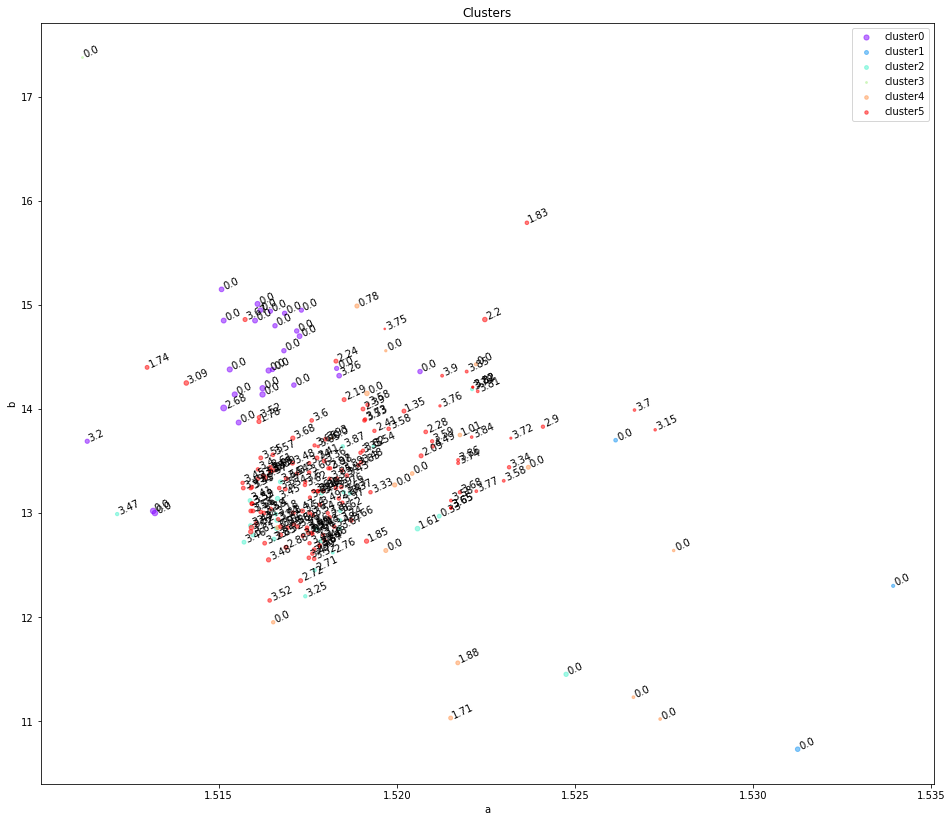

In [58]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = additives_df[additives_df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.a[i], subset.b[i],str(subset['c'][i]), rotation=25) 
    plt.scatter(subset.a, subset.b, s= subset.d*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('a')
plt.ylabel('b')